In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import animation, rc
from IPython.display import HTML

# Quantum Particle in a Box

Let's take a graphical look at the quantum particle in a box. We will use the results we found in class:

$$E_n = n^2\frac{\pi^2\hbar^2}{2mL^2}, n=1, 2, 3, ... \text{(7.41)}$$

$$\psi_n(x)=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}, n=1, 2, 3, ... \text{(7.43)}$$

We will also make use of the time dependent form of our solution:

$$\Psi_n(x, t) = \psi_n(x)e^{-iE_nt/\hbar}$$

In [2]:
def psi(x, L=1, n=1):
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def En(L=1, n=1, m=const.m_e):
    return (n * np.pi * const.hbar)**2 / (2 * m * L**2)

def Psi(x, t, L=1, n=1, m=const.m_e):
    energy = En(L=L, n=n, m=m)
    if isinstance(t, (list, np.ndarray)):
        return psi(x[:, np.newaxis], L=L, n=n) * np.exp(-1j * energy * t[np.newaxis, :] / const.hbar)
    else:
        return psi(x, L=L, n=n) * np.exp(-1j * energy * t / const.hbar)

To get started, we will consider an electron with a 1 cm box.

We can play around with $n$ to see the different states.

<IPython.core.display.Javascript object>


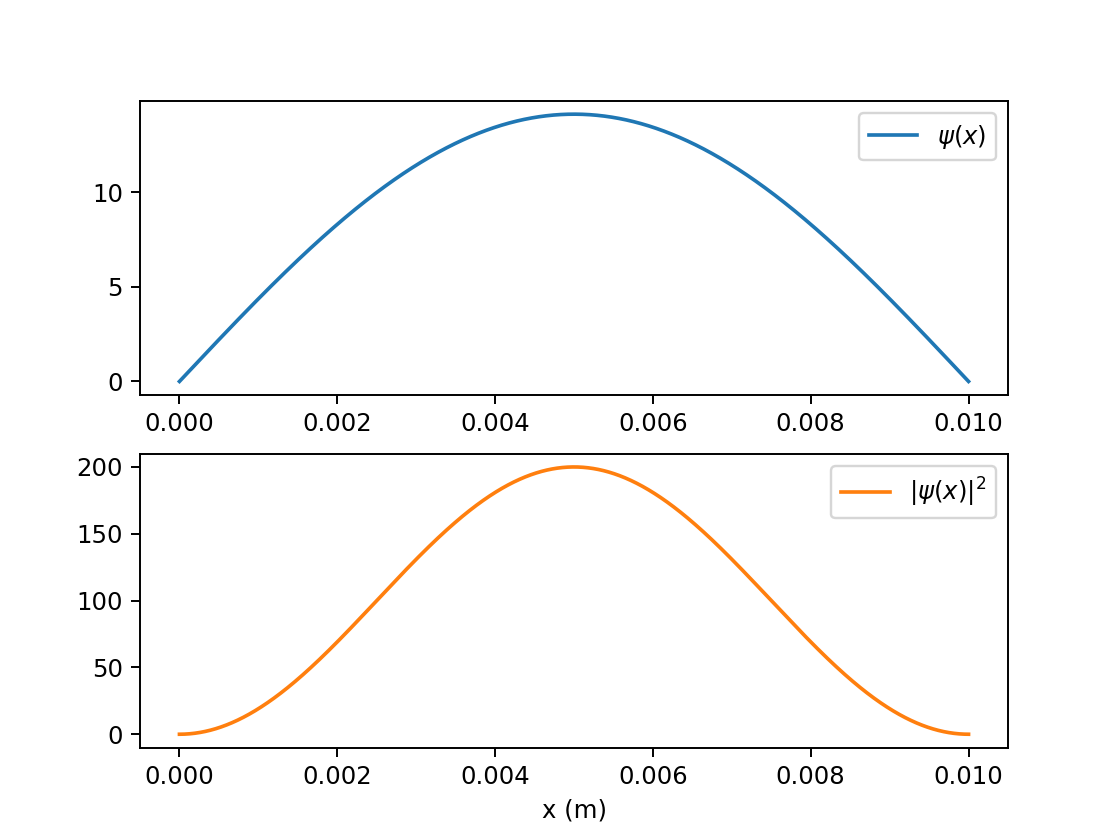

In [17]:
L = 0.01  # 1 cm
n = 1  # Choose an energy state
xarr = np.linspace(0, L, 10000)  # Creates an array from 0 to L with 100 points

fig = plt.figure()
ax1 = plt.subplot(211)
plt.plot(xarr, psi(xarr, L=L, n=n), label='$\psi(x)$')
plt.legend()
plt.subplot(212, sharex=ax1)
plt.plot(xarr, np.abs(psi(xarr, L=L, n=n))**2, 'C1', label='$|\psi(x)|^2$')
plt.xlabel('x (m)')
plt.legend()

Now what happens as time progresses? Let's take a look.

Period = 1.0998233939916862s


<IPython.core.display.Javascript object>


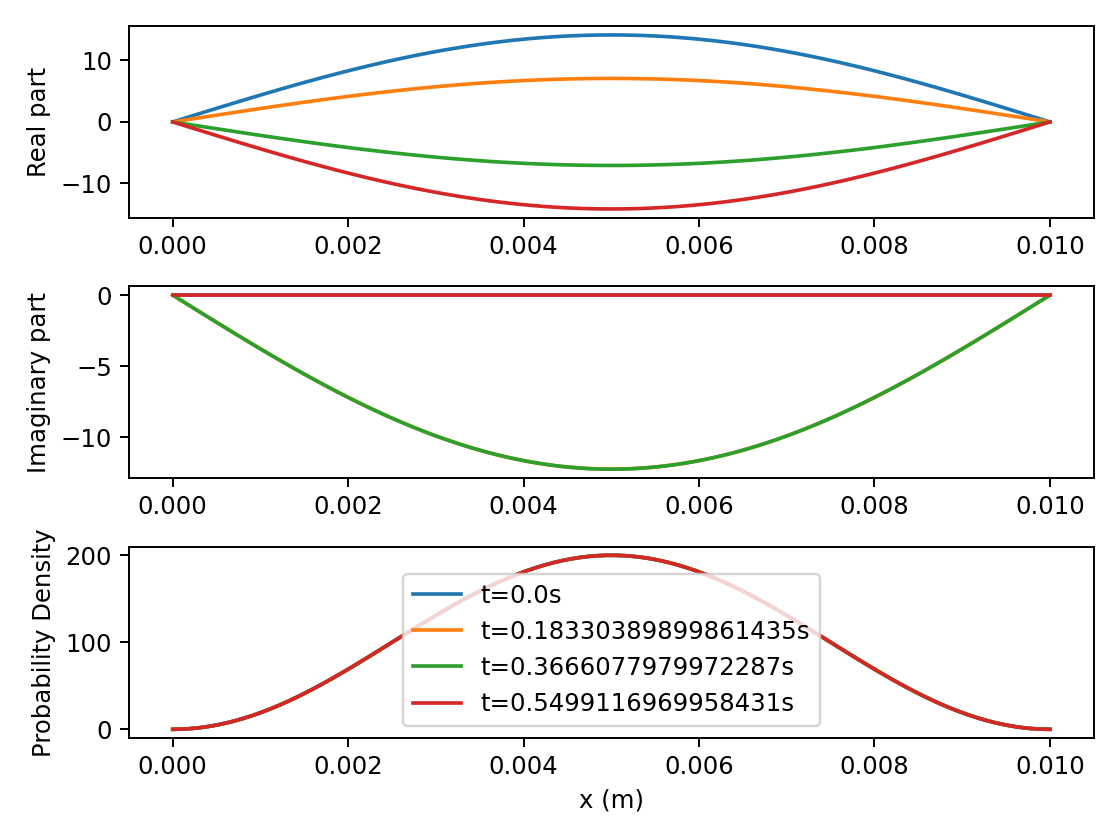

In [18]:
# Some of this is repeated, but here for convenience.
L = 0.01  # 1 cm
n = 1  # Choose an energy state
mass = const.m_e
xarr = np.linspace(0, L, 100)  # Creates an array from 0 to L with 100 points
period = 2 * np.pi * const.hbar / En(L=L, n=n, m=mass)
print(f'Period = {period}s')
tarr = np.linspace(0, period / 2, 4)

fig = plt.figure()
ax1 = plt.subplot(311)
for t in tarr:
    plt.plot(xarr, np.real(Psi(xarr, t, L=L, n=n)), label=f't={t}s')
plt.ylabel('Real part')
plt.subplot(312, sharex=ax1)
for t in tarr:
    plt.plot(xarr, np.imag(Psi(xarr, t, L=L, n=n)), label=f't={t}s')
plt.ylabel('Imaginary part')
plt.subplot(313, sharex=ax1)
for t in tarr:
    plt.plot(xarr, np.abs(Psi(xarr, t, L=L, n=n))**2, label=f't={t}s')
plt.xlabel('x (m)')
plt.legend()
plt.ylabel('Probability Density')
plt.tight_layout()

That's a little hard to parse. Let's try animating it.

Period = 0.12220259933240955s


<IPython.core.display.Javascript object>


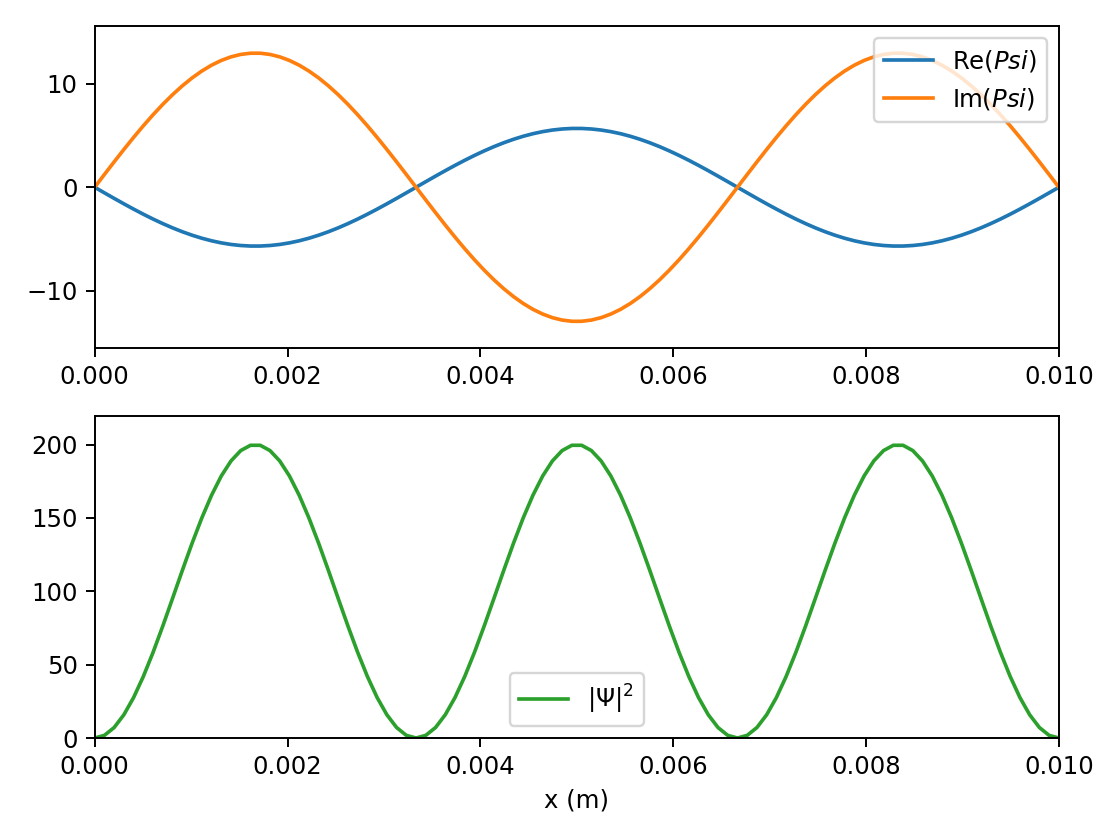

In [21]:
# Some of this is repeated, but here for convenience.
L = 0.01  # 1 cm
n = 3  # Choose an energy state
mass = const.m_e
xarr = np.linspace(0, L, 100)  # Creates an array from 0 to L with 100 points
period = 2 * np.pi * const.hbar / En(L=L, n=n, m=mass)
print(f'Period = {period}s')
tarr = np.linspace(0, period, 20)

wavefcn = Psi(xarr, tarr, L=L, n=n, m=mass)

fig, ax = plt.subplots(nrows=2, ncols=1);
lines = []

ax[0].set_xlim([0, L])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], label='Re($Psi$)')[0]);
lines.append(ax[0].plot([], [], label='Im($Psi$)')[0]);
ax[0].legend(loc='upper right')
ax[1].set_xlim([0, L])
ax[1].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[1].plot([], [], 'C2', label='$|\Psi|^2$')[0]);
plt.legend()
ax[1].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn[:, i]))
    lines[1].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[2].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
HTML(anim.to_html5_video())

Let's go a little further. Why does this time dependence matter at all if the probability density never changes?

Well, so far we have looked at solutions to the time **independent** Schrodinger equation. But these are not the only solutions to the time **dependent** Schrodinger equation. It turns out you can combine solutions to the former and they will satisfy the latter. In other words, you can have states that are combinations of energy states. This is the idea of *superposition*.

Let's see what happens to an electron if its wavefunction is a combination of two energy states.

period1 = 1.0998233939916862, period2 = 0.27495584849792154, period = 1.0998233939916862


<IPython.core.display.Javascript object>


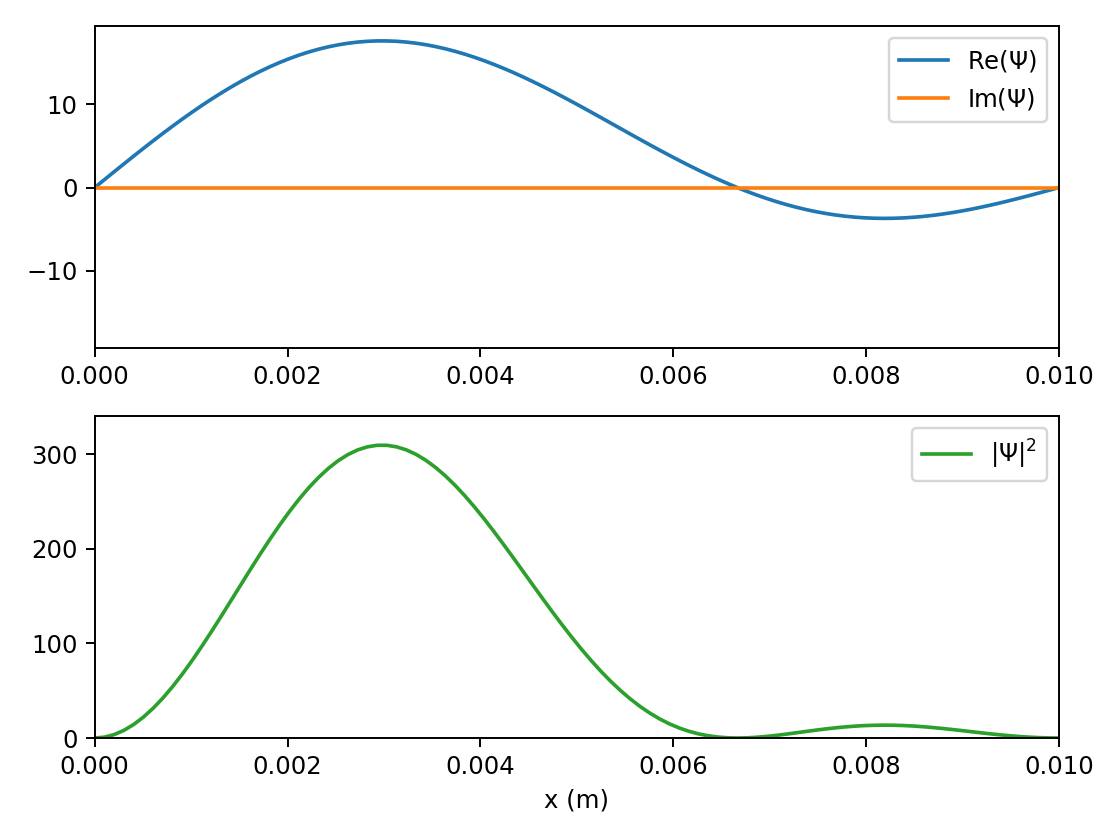

In [23]:
# Some of this is repeated, but here for convenience.
L = 0.01  # 1 cm
n1 = 1  # Choose an energy state
n2 = 2
mass = const.m_e
xarr = np.linspace(0, L, 100)  # Creates an array from 0 to L with 100 points
period1 = 2 * np.pi * const.hbar / En(L=L, n=n1, m=mass)
period2 = 2 * np.pi * const.hbar / En(L=L, n=n2, m=mass)
period = 2 * np.pi * const.hbar / En(L=L, n=1, m=mass)

print(f'period1 = {period1}, period2 = {period2}, period = {period}')

tarr = np.linspace(0, period, 100)

wavefcn1 = Psi(xarr, tarr, L=L, n=n1, m=mass)
wavefcn2 = Psi(xarr, tarr, L=L, n=n2, m=mass)
wavefcn = 1 / np.sqrt(2) * (wavefcn1 + wavefcn2)

fig, ax = plt.subplots(nrows=2, ncols=1);
lines = []

ax[0].set_xlim([0, L])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], label='Re($\Psi$)')[0]);
lines.append(ax[0].plot([], [], label='Im($\Psi$)')[0]);
ax[0].legend(loc='upper right')
ax[1].set_xlim([0, L])
ax[1].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[1].plot([], [], 'C2', label='$|\Psi|^2$')[0]);
plt.legend()
ax[1].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn[:, i]))
    lines[1].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[2].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
HTML(anim.to_html5_video())

This next version is a different view to try to visualize the *interference* between the two energy states.

period1 = 1.0998233939916862, period2 = 0.27495584849792154, period = 1.0998233939916862


<IPython.core.display.Javascript object>


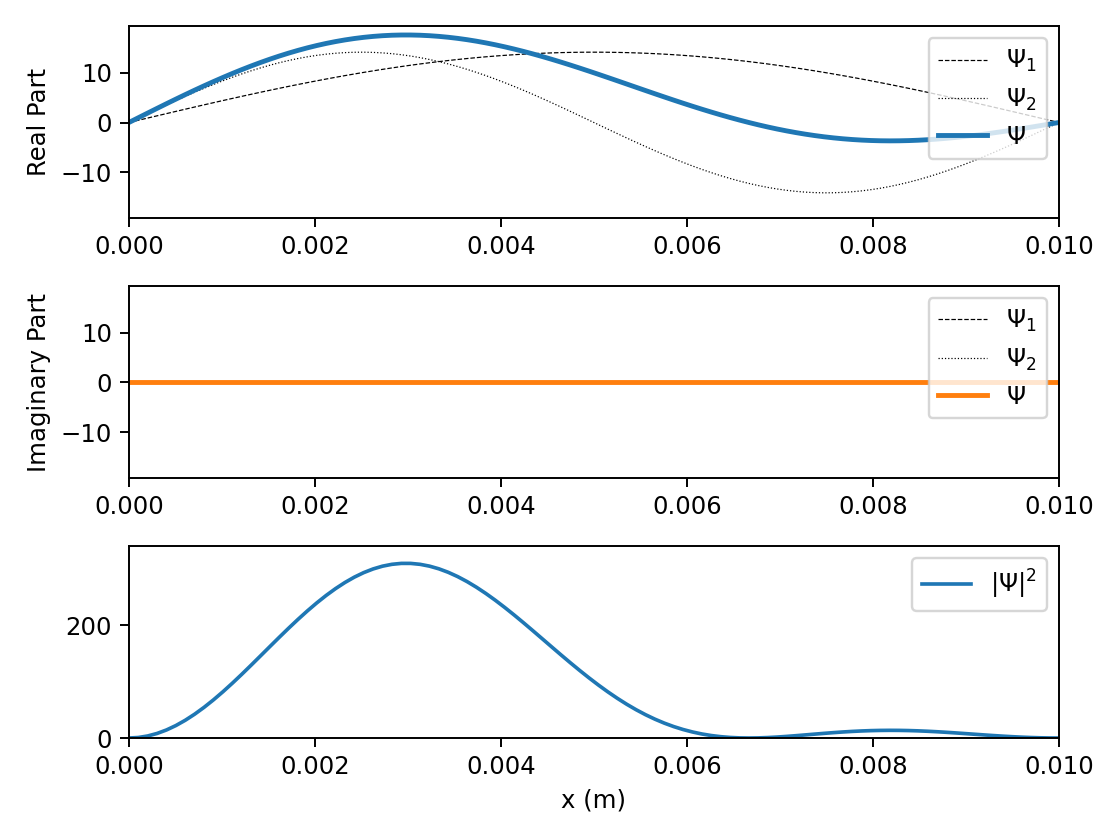

In [24]:
# Some of this is repeated, but here for convenience.
L = 0.01  # 1 cm
n1 = 1  # Choose an energy state
n2 = 2
mass = const.m_e
xarr = np.linspace(0, L, 100)  # Creates an array from 0 to L with 100 points
period1 = 2 * np.pi * const.hbar / En(L=L, n=n1, m=mass)
period2 = 2 * np.pi * const.hbar / En(L=L, n=n2, m=mass)
period = 2 * np.pi * const.hbar / En(L=L, n=1, m=mass)

print(f'period1 = {period1}, period2 = {period2}, period = {period}')

tarr = np.linspace(0, period, 100)

wavefcn1 = Psi(xarr, tarr, L=L, n=n1, m=mass)
wavefcn2 = Psi(xarr, tarr, L=L, n=n2, m=mass)
wavefcn = 1 / np.sqrt(2) * (wavefcn1 + wavefcn2)

fig, ax = plt.subplots(nrows=3, ncols=1);
lines = []

ax[0].set_xlim([0, L])
ax[0].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[0].plot([], [], '--k', label='$\Psi_1$', lw=0.5)[0]);
lines.append(ax[0].plot([], [], ':k', label='$\Psi_2$', lw=0.5)[0]);
lines.append(ax[0].plot([], [], label='$\Psi$', lw=2)[0]);
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Real Part')
ax[1].set_xlim([0, L])
ax[1].set_ylim([1.1 * np.min(np.real(wavefcn)), 1.1 * np.max(np.real(wavefcn))])
lines.append(ax[1].plot([], [], '--k', label='$\Psi_1$', lw=0.5)[0]);
lines.append(ax[1].plot([], [], ':k', label='$\Psi_2$', lw=0.5)[0]);
lines.append(ax[1].plot([], [], 'C1', label='$\Psi$', lw=2)[0]);
ax[1].legend(loc='upper right')
ax[1].set_ylabel('Imaginary Part')
ax[2].set_xlim([0, L])
ax[2].set_ylim([0, 1.1 * np.max(np.abs(wavefcn)**2)])
lines.append(ax[2].plot([], [], label='$|\Psi|^2$')[0]);
plt.legend()
ax[2].set_xlabel('x (m)')
plt.tight_layout()
    
def init():
    for line in lines:
        line.set_data([], [])

def animate(i):
    lines[0].set_data(xarr, np.real(wavefcn1[:, i]))
    lines[1].set_data(xarr, np.real(wavefcn2[:, i]))
    lines[2].set_data(xarr, np.real(wavefcn[:, i]))
    lines[3].set_data(xarr, np.imag(wavefcn1[:, i]))
    lines[4].set_data(xarr, np.imag(wavefcn2[:, i]))
    lines[5].set_data(xarr, np.imag(wavefcn[:, i]))
    lines[6].set_data(xarr, np.abs(wavefcn[:, i])**2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(tarr), interval=100, blit=True)
HTML(anim.to_html5_video())